# 7.2 python 图像处理

## 7.2.2 图像基本操作

### 1.图像读取和显示

In [1]:
from skimage import io

In [2]:
robot = io.imread('data/Robot.jpg')
robot.shape

(372, 400, 3)

In [3]:
type(robot)

imageio.core.util.Array

In [4]:
io.imshow(robot)

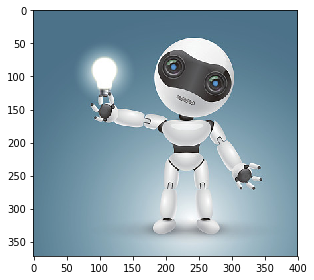

In [5]:
io.show()

### 2. 图像的坐标和颜色

In [6]:
robot[91, 221]

Array([65, 61, 62], dtype=uint8)

In [7]:
robot[91, 221, 0]

65

In [8]:
robot[77:80, 221:231, 0]

Array([[ 37,  90,  79,  61,  41,  42, 129,  75,  75,  72],
       [ 32,  38,  85,  63,  52,  41,  78, 113,  65,  71],
       [ 38,  33,  69,  78,  60,  44,  53, 116,  68,  63]], dtype=uint8)

### 3. 图像裁剪

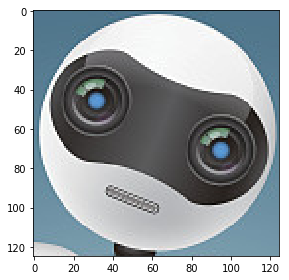

In [9]:
head = robot[40:165, 180:305]
io.imshow(head)
io.show()
io.imsave('RobotHead.jpg', head)

# 7.3 案例：深度学习实现图像分类

In [2]:
#例7-1 利用keras建立模型，训练鸢尾花数据集

from keras.models import Sequential
from keras.layers import Dense, Activation

In [3]:
# 定义模型结构
model = Sequential()
model.add(Dense(units=16, input_shape=(4,)))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(3))
model.add(Activation('softmax'))

In [4]:
#定义损失函数和优化器，并编译
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

filename = 'data\iris.data'
data = pd.read_csv(filename, header = None)
data.columns = ['sepal length','sepal width','petal length','petal width','class']
data.iloc[0:5,:]

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#数据预处理
#convert classname to integer
data.loc[ data['class'] == 'Iris-setosa', 'class' ] = 0
data.loc[ data['class'] == 'Iris-versicolor', 'class' ] = 1
data.loc[ data['class'] == 'Iris-virginica', 'class' ] = 2
#data
X = data.iloc[:,0:4].values.astype(float)
y = data.iloc[:,4].values.astype(int)
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [6]:
#keras多分类问题需要将类型转化为独热矩阵
#与pd.get_dummies()函数作用一致
train_y_ohe = np_utils.to_categorical(train_y, 3)
test_y_ohe = np_utils.to_categorical(test_y, 3)

#print(test_y_ohe )
#训练模型
model.fit(train_x, train_y_ohe, epochs=50, batch_size=1, verbose=2, validation_data=(test_x,test_y_ohe))

Train on 120 samples, validate on 30 samples
Epoch 1/50
 - 1s - loss: 0.8743 - acc: 0.6083 - val_loss: 0.6053 - val_acc: 1.0000
Epoch 2/50
 - 0s - loss: 0.5081 - acc: 0.8167 - val_loss: 0.4531 - val_acc: 0.9667
Epoch 3/50
 - 0s - loss: 0.4256 - acc: 0.9083 - val_loss: 0.4620 - val_acc: 0.6667
Epoch 4/50
 - 0s - loss: 0.3772 - acc: 0.9083 - val_loss: 0.4296 - val_acc: 0.7000
Epoch 5/50
 - 0s - loss: 0.3389 - acc: 0.9250 - val_loss: 0.3879 - val_acc: 0.7333
Epoch 6/50
 - 0s - loss: 0.3100 - acc: 0.9250 - val_loss: 0.2521 - val_acc: 0.9667
Epoch 7/50
 - 0s - loss: 0.2786 - acc: 0.9667 - val_loss: 0.3413 - val_acc: 0.7667
Epoch 8/50
 - 0s - loss: 0.2976 - acc: 0.8917 - val_loss: 0.2211 - val_acc: 1.0000
Epoch 9/50
 - 0s - loss: 0.2435 - acc: 0.9583 - val_loss: 0.2162 - val_acc: 1.0000
Epoch 10/50
 - 0s - loss: 0.2265 - acc: 0.9583 - val_loss: 0.2381 - val_acc: 0.9667
Epoch 11/50
 - 0s - loss: 0.2086 - acc: 0.9500 - val_loss: 0.2300 - val_acc: 0.9667
Epoch 12/50
 - 0s - loss: 0.1807 - acc: 

In [7]:
# 评估模型
loss, accuracy = model.evaluate(test_x, test_y_ohe, verbose=2)
print('loss = {},accuracy = {} '.format(loss,accuracy) )
# 查看预测结果
classes = model.predict(test_x, batch_size=1, verbose=2)
print('测试样本数：',len(classes))
print("分类概率:\n",classes)

loss = 0.03048795834183693,accuracy = 1.0 
测试样本数： 30
分类概率:
 [[1.3548681e-12 1.5921133e-03 9.9840790e-01]
 [3.2531228e-04 9.9715120e-01 2.5235154e-03]
 [9.9987400e-01 1.2594431e-04 2.5476525e-16]
 [7.9801391e-12 9.2756702e-03 9.9072438e-01]
 [9.9947482e-01 5.2517973e-04 6.6590620e-14]
 [3.4914308e-14 6.1368622e-04 9.9938631e-01]
 [9.9956900e-01 4.3104211e-04 3.3764729e-14]
 [1.2005299e-05 9.9075198e-01 9.2359073e-03]
 [7.2939692e-06 9.8153299e-01 1.8459717e-02]
 [2.6494509e-04 9.9837023e-01 1.3649167e-03]
 [1.3439935e-09 4.3043520e-02 9.5695651e-01]
 [2.6631778e-05 9.9418229e-01 5.7910746e-03]
 [1.4352696e-05 9.7432250e-01 2.5663061e-02]
 [6.2706740e-06 9.6447623e-01 3.5517499e-02]
 [4.7944127e-06 9.3015236e-01 6.9842853e-02]
 [9.9927896e-01 7.2102522e-04 1.9921177e-13]
 [5.8079477e-06 9.2962450e-01 7.0369698e-02]
 [1.3611661e-05 9.1690493e-01 8.3081402e-02]
 [9.9886912e-01 1.1308851e-03 9.5983529e-13]
 [9.9978107e-01 2.1897472e-04 2.5291267e-15]
 [8.8280355e-11 7.2731571e-03 9.9272680e

## 7.3.3 用 keras 实现图像分类

#### 2.图像分类的实现

In [13]:
### 例 7-2 利用keras建立深度神经网络，实现CIFAR-10数据集 图像分类

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

batch_size = 32 #批处理大小
num_classes = 10 #分类个数
epochs = 10 #迭代次数

In [14]:
from keras.datasets import cifar10
# 导入CIFAR-10数据集，分别获得训练集和测试集:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 将像素值归一化为[0,1]
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
# 将类向量转换为二元类矩阵
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#构建CNN模型
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', 
    input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [15]:
# 初始化RMSprop优化器
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

In [16]:
# 模型编译
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [17]:
# 模型训练
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 100s 2ms/step - loss: 1.8034 - acc: 0.3381 - val_loss: 1.5596 - val_acc: 0.4428
Epoch 2/10
50000/50000 [==============================] - 100s 2ms/step - loss: 1.4942 - acc: 0.4565 - val_loss: 1.3707 - val_acc: 0.5098
Epoch 3/10
50000/50000 [==============================] - 103s 2ms/step - loss: 1.3571 - acc: 0.5133 - val_loss: 1.3033 - val_acc: 0.5431
Epoch 4/10
50000/50000 [==============================] - 109s 2ms/step - loss: 1.2607 - acc: 0.5500 - val_loss: 1.1435 - val_acc: 0.5935
Epoch 5/10
50000/50000 [==============================] - 113s 2ms/step - loss: 1.1767 - acc: 0.5830 - val_loss: 1.0662 - val_acc: 0.6254
Epoch 6/10
50000/50000 [==============================] - 113s 2ms/step - loss: 1.1099 - acc: 0.6075 - val_loss: 1.0714 - val_acc: 0.6221
Epoch 7/10
50000/50000 [==============================] - 110s 2ms/step - loss: 1.0479 - acc: 0.6309 - val_loss: 0.9640 - 

In [18]:
# 模型评估
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 5s 546us/step
Test loss: 0.899125216293335
Test accuracy: 0.6843


#### 3.使用预训练模型进行图像分类

In [2]:
#例7-3 使用keras提供的 ResNet50 图像分类模型，对给定图像进行分类
#模型可自动下载，也可将模型"resnet50_weights_tf_dim_ordering_tf_kernels.h5"放入".keras/models/"文件夹内

from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.applications.resnet50 import decode_predictions
from keras.preprocessing import image
import numpy as np

In [3]:
#导入预训练模型ResNet50
model = ResNet50(weights='imagenet')

# 对输入图片进行处理
img_path = 'data/elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [4]:
# 模型预测
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])
# Predicted: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122357),(u'n02504458', u'African_elephant', 0.061040461)]

40960/35363 [==================================] - 0s 3us/step
Predicted: [('n01871265', 'tusker', 0.561299), ('n02504458', 'African_elephant', 0.37881038), ('n02504013', 'Indian_elephant', 0.05610156)]
